# Color Channel Statistics
- By computing basic statistics, such as mean and standard deviation for each channel of an image, we are able to quantify and represent the color distribution of an image. 
- If two images have similar means and standard deviations, we can assume that these images have similar color distributions
- Color channel image descriptor has 3 steps:
    - Separate the input image into its respective channels. 
    - Compute various statistics for each channel, such as mean, stdev, skew, and kurtosis
    - Concat the stats together to form a list of stats for each color channel - this becomes our feature vector.

In [1]:
import sys
sys.path.append("../")

In [3]:
from scipy.spatial import distance as dist
from imutils import paths
import numpy as np
import cv2
from cv_imshow import display_image, create_subplot
from matplotlib import pyplot as plt

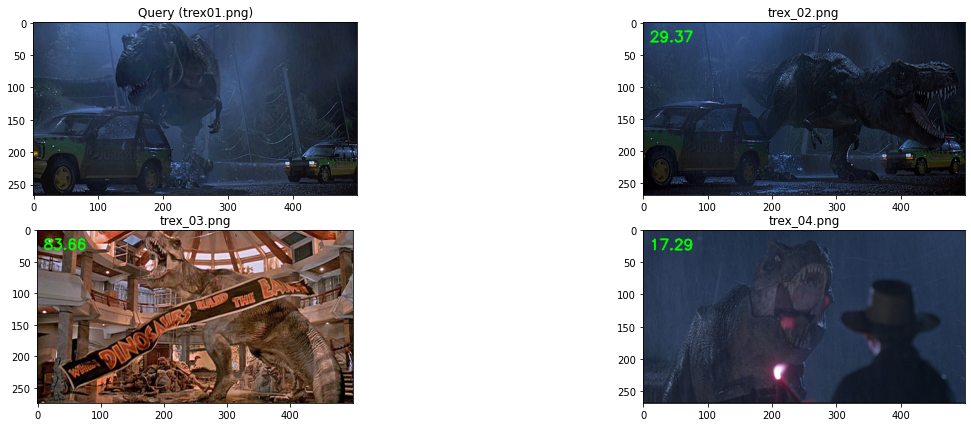

In [15]:
imagePaths = sorted(list(paths.list_images("../images/dinos/")))

#key will be filename and value will be feature vector
index = {}

#loop over image paths
for imagePath in imagePaths:
    image = cv2.imread(imagePath)
    filename = imagePath[imagePath.rfind("/")+1:]
    
    #extract mean and stdev from each channel
    (means, stds) = cv2.meanStdDev(image)
    features = np.concatenate([means, stds]).flatten()
    index[filename] = features

#display the query image and grab the sorted keys of the index dictionary
fig = plt.figure(figsize=(20,7))
rows = 2
columns = 2 

query = cv2.imread(imagePaths[0])
create_subplot(fig, rows, columns, 1, "Query (trex01.png)", query)
keys = sorted(index.keys())


#loop over filenames in the dictionary
for (i,k) in enumerate(keys):
    if k == "trex_01.png":
        continue
    
    #load current image and compute Euclidean dist between query image and current image feature vectors
    image = cv2.imread(imagePaths[i])
    d = dist.euclidean(index["trex_01.png"], index[k])
    
    #display the distance between the query image and current image
    cv2.putText(image, "%.2f" % (d), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 255, 0), 2)
    create_subplot(fig, rows, columns, i+1, k, image)
    